## About Dataset
Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance


Link:https://www.kaggle.com/datasets/mirichoi0218/insurance

## Importing Modules

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

In [22]:
dataset=pd.read_csv("insurance.csv")

## Data Preprocessing

In [23]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [27]:
dataset.groupby('sex')

In [28]:
dataset=pd.get_dummies(data=dataset,drop_first=True)
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB


In [30]:
dataset.shape

(1338, 9)

## Correlation Matrix

In [31]:
X=dataset.drop("charges",axis=1)
y=dataset['charges']

<Axes: title={'center': 'Correlation with Charges'}>

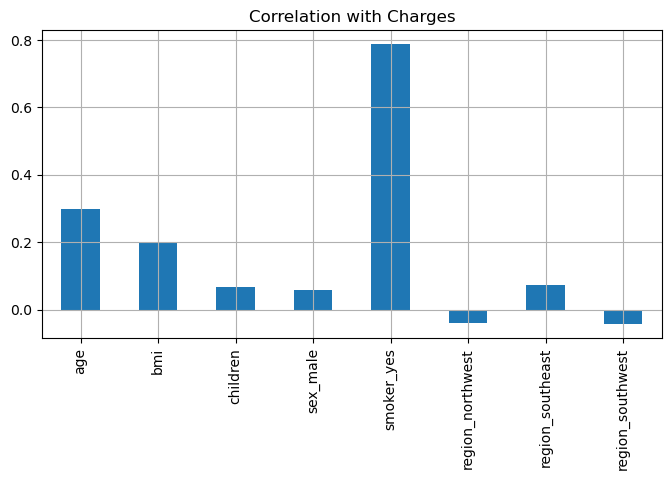

In [32]:
# X.corrwith(y).plot.bar(
#     figsize=(8,4),title="Correlation with Charges",grid=True)


correlation_matrix = X.corr()
X.corrwith(y).plot.bar(figsize=(8, 4), title="Correlation with Charges", grid=True)


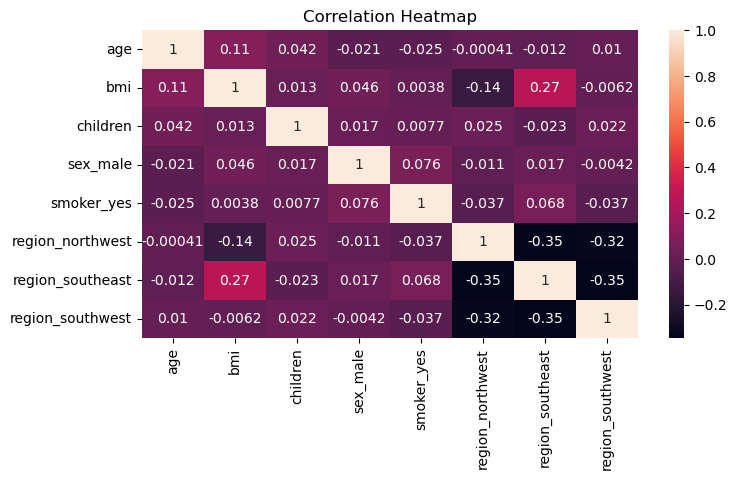

In [33]:
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

## Model Selection

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)

X_test=sc.transform(X_test)

In [35]:
X_train

array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 0.54331294, -1.03308239, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 0.8987451 , -0.94368672, -0.91119211, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.16755139,  2.82086429,  0.73433626, ..., -0.56079971,
        -0.59966106,  1.74729228],
       [ 1.1120044 , -0.10932713, -0.91119211, ..., -0.56079971,
        -0.59966106,  1.74729228]])

In [36]:
X_test

array([[ 0.40114007, -0.89153925,  0.73433626, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.23863782, -0.08946143, -0.91119211, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 1.75178229, -0.60845296, -0.91119211, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       ...,
       [-0.09646495, -0.41972876, -0.08842793, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 1.04091797,  2.78941026, -0.91119211, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       [ 0.82765867,  0.60252728, -0.08842793, ..., -0.56079971,
        -0.59966106,  1.74729228]])

In [40]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.7835929767120722

In [41]:
#RandomForestRegressor Model
model2=RandomForestRegressor()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
r2_score(y_test,y_pred)

0.8658261732255065

In [49]:
#XGboost Regressor Model
model3=XGBRFRegressor()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
r2_score(y_test,y_pred)

0.8794233354148805

In [52]:
param_grid = {
    'max_depth': range(2, 10),
    'n_estimators': [60, 100, 160],
    'learning_rate': [0.1, 0.01, 0.05]
}


In [54]:
grid_search = GridSearchCV(
    estimator=model3,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)
grid_search.fit(X_train, y_train)
y_pred=model3.predict(X_test)
r2_score(y_test,y_pred)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


0.8794233354148805

## Predicting A Data

In [55]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [60]:
ramo_new=[[40,45.5,4,1,1,0,0,0]]

In [61]:
model3.predict(sc.transform(ramo_new))

C:\Users\Bigie\Documents\PROJECTS\A.I\Medical-Datasets\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([43316.086], dtype=float32)